# Task 1

### predicting the percentage of a student based on the number of study hours 

#### Using **Linear Regression**

In [1]:
#importing used libraries

#linear algebra operations, manipulation, visualization...

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# laoding dataset

path ="student_scores.csv"
data=pd.read_csv(path) 
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data Discovery

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualization

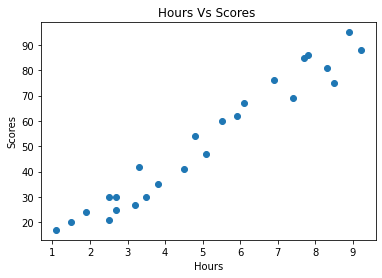

In [5]:
plt.scatter(x=data.Hours,y=data.Scores)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours Vs Scores ")
plt.show()

## Data Preparation

In [6]:
# Data Cleaning 

data.isnull().sum()   #no null values

Hours     0
Scores    0
dtype: int64

### Spliting dataset

In [7]:
# split dataset for training


x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  
print("shape of x",x.shape)
print("shape of y", y.shape)

shape of x (25, 1)
shape of y (25,)


In [8]:
#sklearn to train the dataset

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2, random_state=0)


In [9]:
print("shape of X Train",X_train.shape)
print("shape of Y Train",Y_train.shape)
print("shape of X Test", X_test.shape)
print("shape of Y Test",Y_test.shape)

shape of X Train (20, 1)
shape of Y Train (20,)
shape of X Test (5, 1)
shape of Y Test (5,)


## Linear regression modelling

In [10]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [11]:
lr.fit(X_train,Y_train)

LinearRegression()

In [12]:
lr.coef_

array([9.91065648])

In [13]:
lr.intercept_

2.018160041434683

In [14]:
y_pred=lr.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [15]:
#early prediction for given number of hours

hours= [[9.25]]
pred=lr.predict(hours)
print(pred)

[93.69173249]


In [16]:
pd.DataFrame(np.c_[X_test,Y_test,y_pred], 
             columns=["study_hours","student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


## Fine tuning

In [17]:
lr.score(X_test,Y_test) # accuracy= 94.54%

0.9454906892105356

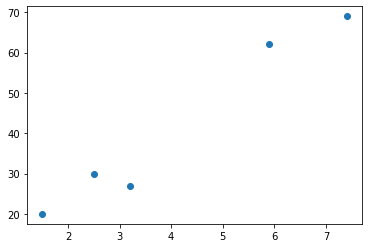

In [18]:
plt.scatter(X_test,Y_test)

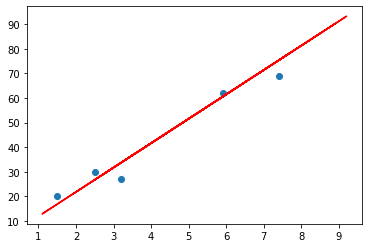

In [19]:
plt.scatter(X_test,Y_test)
plt.plot(X_train,lr.predict(X_train),color="red")

## *PREDICT*

In [20]:
#joblib 

#save and load data  -> predict

import joblib
joblib.dump(lr,"Student_Marks_Predictor.pkl")

['Student_Marks_Predictor.pkl']

In [21]:
model=joblib.load("Student_Marks_Predictor.pkl")

In [22]:
model.predict([[9.25]])

array([93.69173249])